# Ejemplo de regresión lineal simple.

---



La **regresión lineal simple** es un modelo en el que hay dos variables una de entrada (x) y una de salida (y) y ambas están relacionadas de forma lineal, es decir se pueden representar en una línea recta en un plano.

En este ejercicio vamos a tener dos variables (x, y) y vamos a aplicar un **algoritmo supervisado** de machine learning de **regresión lineal** para generar un modelo con el objetivo de predecir el valor de salida de una variable de entrada.








### Importar librerías de Python necesarias 

En primer lugar, importamos librerias **Numpy** y **Pandas** de **Python**.

In [0]:
import numpy as np
import pandas as pd

### Carga de datos

Vamos a asignar un conjunto de valores a las variables x e y, Inicialmente vamos a asignar 30 valores para ambas variables. Las variables serán de tipo array de la librería **Numpy** de **Python**. 

In [0]:
x = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24],[25],[26],[27],[28],[29],[30]]) 
y = np.array([[3],[6],[9],[12],[13],[14],[15],[18],[21],[24],[27],[30],[33],[34],[37],[40],[40],[43],[46],[49],[52],[52],[55],[56],[59],[62],[65],[68],[71],[72]])

### Visualización de datos

Una vez cargados los datos, vamos a visualizarlos en una gráfica utilizando la librería **Matplotlib** de **Python**.

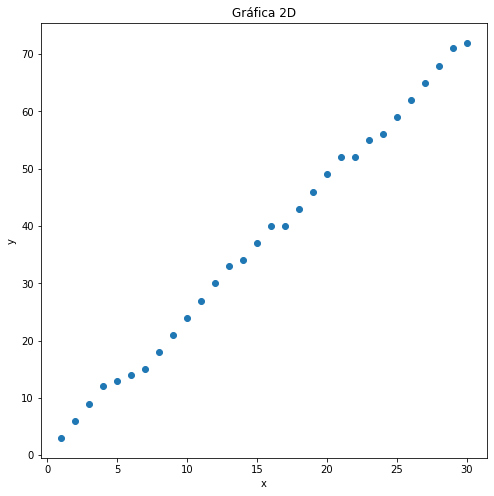

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title('Gráfica 2D')
plt.xlabel('x')  
plt.ylabel('y')
plt.scatter(x, y);

Para que tenga sentido generar un modelo de regresión lineal, es necesario que los datos tengan una distribución normal, es decir que los datos formen una especie de campana. En este caso vamos a visualizarlos en una gráfica utilizando la librería **Seaborn** de **Python**.

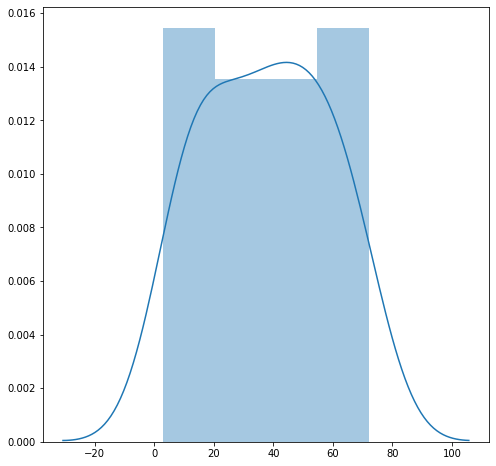

In [4]:
import seaborn as seabornInstance 
plt.figure(figsize=(8,8))
plt.tight_layout()
seabornInstance.distplot(y)

### Generar un primer modelo de regresión lineal

**Inicialización del modelo**

Para generar un modelo de regresión lineal, debemos importar la clase ***LinearRegression*** de la libreria **Sklearn**.

Posteriormente **inicializamos** una instancia de la clase ***LinearRegression*** invocando a su constructor.

In [0]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression() 

**Entrenamiento del modelo**

El siguiente paso será **entrenar** el modelo, para entrenar el modelo invocamos al método ***fit()*** de la instancia de la clase, al método se le debe pasar por parámetro los datos de *x* y los datos de *y*.

Una vez entrenado el modelo, el mismo ya ha generado esa ecuación en forma de recta y podemos visualizar el punto de corte con el eje y invocando el atributo ***intercept_*** de la instancia y la pendiente de la recta invocando el atributo ***coef_*** de la instancia.

In [6]:
modelo.fit(x, y)
print("Punto de intercepción:", modelo.intercept_)
print("Pendiente de la recta:", modelo.coef_)

Punto de intercepción: [0.71264368]
Pendiente de la recta: [[2.37552836]]


**Predicción del modelo**

Una vez generado el modelo el objetivo del mismo es **predecir** un valor de salida dado un valor de entrada nuevo. Para esto invocamos al método ***predict()*** de la instancia del modelo.

In [7]:
y_pred = modelo.predict([[38]])
print("Predicción para x=[[38]]:", y_pred)

Predicción para x=[[38]]: [[90.98272154]]


### Dataset de entrenamiento y datset de prueba.

Anteriormente hemos generado un primer modelo con una serie de datos, pero en machine learning debemos tener dos datsets, el primero para **entrenar el modelo** y el segundo para **probar el modelo** y poder medir la **precisión del modelo**.



In [0]:
x_train = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22],[23],[24],[25],[26],[27],[28],[29],[30]]) 
y_train = np.array([[3],[6],[9],[12],[13],[14],[15],[18],[21],[24],[27],[30],[33],[34],[37],[40],[40],[43],[46],[49],[52],[52],[55],[56],[59],[62],[65],[68],[71],[72]])
x_test = np.array([[31],[32],[33],[34],[35],[36],[37],[38]]) 
y_test = np.array([[75],[75],[78],[81],[84],[87],[90],[93]])

Ahora tenemos un datset para entrenar el modelo (el mismo del ejemplo anterior) y tenemos un nuevo dataset para probar el modelo.

A continuación **inicializamos** y **entrenamos** el modelo.

In [9]:
modelo = LinearRegression() 
modelo.fit(x_train, y_train)
print("Punto de intercepción:", modelo.intercept_)
print("Pendiente de la recta:", modelo.coef_)

Punto de intercepción: [0.71264368]
Pendiente de la recta: [[2.37552836]]


Realizamos la **predicción** con el dataset de test (*x_test*) y guardamos los valores estimados en el dataset de la predicción (*y_pred*).

Una vez realizada la predicción tenemos los valores de salida reales (*y_test*) y los valores estimados por el modelo (*y_pred*). Podemos visualizarlos en una tabla.

In [10]:
y_pred = modelo.predict(x_test)
df = pd.DataFrame({'Real': y_test.flatten(), 'Pred.': y_pred.flatten()})
df

,Real,Pred.
0,75,74.354023
1,75,76.729551
2,78,79.105080
3,81,81.480608
4,84,83.856136
5,87,86.231665
6,90,88.607193
7,93,90.982722


También se pueden visualizar en una gráfica, los puntos azules son los datos de prueba del modelo y la línea roja es la ecuación que generó el algoritmo con los datos de entrenamiento.

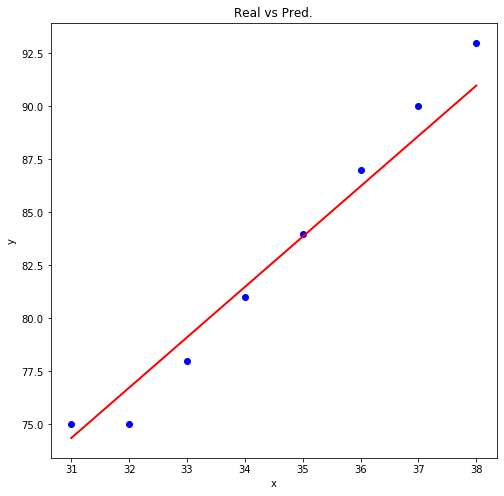

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.title('Real vs Pred.')
plt.xlabel('x')  
plt.ylabel('y')
plt.show()

### Medidas error y precisión del modelo

Finalmente para medir nuestro modelo utilizamos varias fórmulas, como el **error absoluto medio**, **error cuadrático medio** y **raíz cuadrada del error cuadrático medio** para medir de forma cuantitativa el **error del modelo**. Con el marcador **R2** medimos la **precisión** del modelo en una escala de 0 a 1. Para medir errores y la precisión del modelo utilizamos funciones de métrica de la librería **Sklearn** de **Python**.

In [12]:
from sklearn import metrics
print('Error absoluto medio       :', metrics.mean_absolute_error(y_test, y_pred))  
print('Error cuadrático medio     :', metrics.mean_squared_error(y_test, y_pred))  
print('Raiz error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Marcador R2                :', metrics.r2_score(y_test, y_pred))

Error absoluto medio       : 1.0354375231739006
Error cuadrático medio     : 1.4351472997160162
Raiz error cuadrático medio: 1.197976335207009
Marcador R2                : 0.9644407947418409
